In [20]:
# Data Processing
import pandas as pd
import numpy as np
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
# Scaling
from sklearn.preprocessing import MinMaxScaler
# Statistical Analysis
from scipy import stats
# Modeling
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

import warnings 
warnings.filterwarnings("ignore")

# 1. Exploratory Data Analysis (EDA)
From the innitial exploration, we can see that the column `PURCHASES` contains values acquired from the sum of two adjacent columns, namely `ONEOFF_PURCHASES` and `INSTALLMENTS_PURCHASES`. This column could therefore be dropped to avoid redundancy. From the correlation heatmap, it can also be seen that `PURCHASES` has high positive correlation with its two engineered feature previously mentioned. Furthermore, we also notice a relatively strong positive correlation between the column `CREDIT LIMIT` and `BALANCE`. It means that the customers with more balance is their account is mostly trusted with more credit limit. 

After calculating the outlier by the manual-made-function, it can be seen that our dataset has a high degree of variability as outliers are found in almost all columns. In this case, the outliers exceeds 10 percent from the total data in 5 out of 17 numerical columns. 

In terms of missing values, we found them in two columns in our dataset, namely `CREDIT_LIMIT` and `MINIMUM_PAYMENTS`. We need therefore preprocess the data by filling the missing value in the next section. 

In [2]:
df = pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


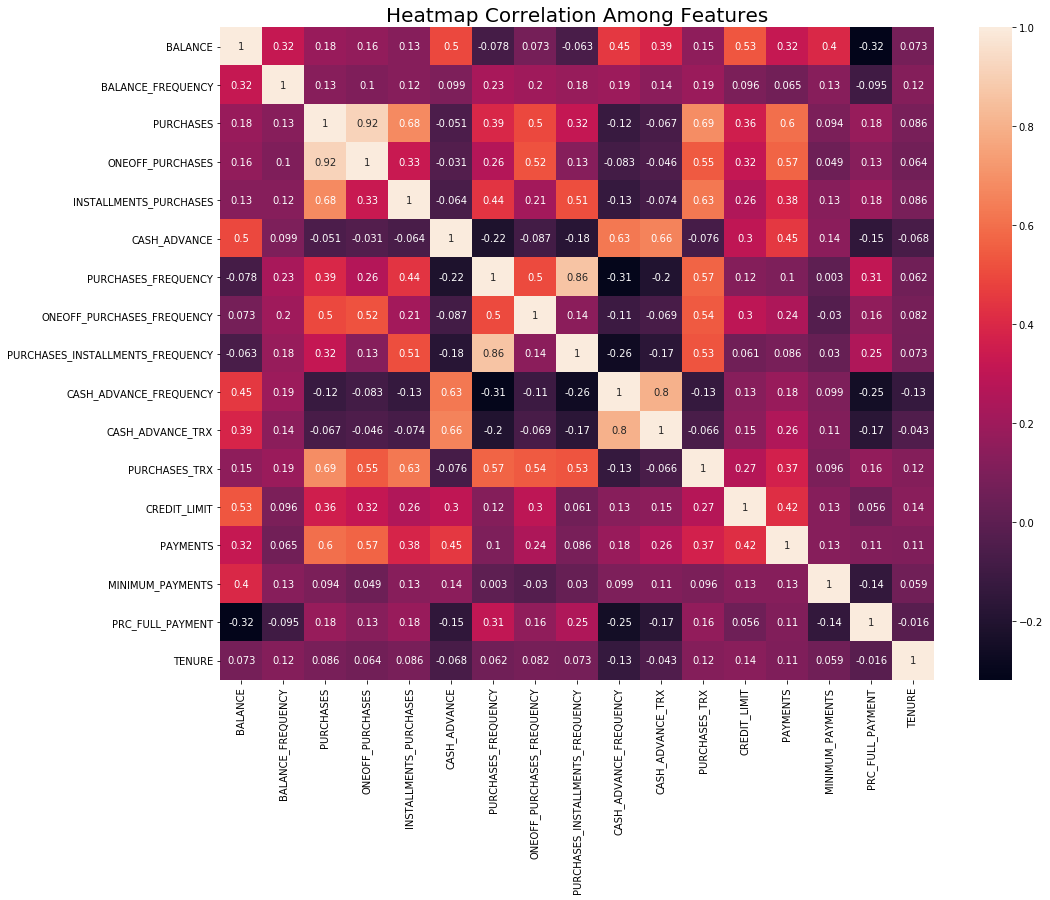

In [3]:
feature = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

plt.figure(figsize=(16,12))
ax = sns.heatmap(df[feature].corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Heatmap Correlation Among Features', size=20)
plt.show()

In [4]:
def outlier_percentage(data):
    '''
    This function calculates the percentage of outlier in a dataset.
    '''
    quantile_1 = data.quantile(0.25)
    quantile_3 = data.quantile(0.75)
    IQR = quantile_3 - quantile_1
    lower_treshold = quantile_1 - (1.5 * IQR)
    upper_threshold = quantile_3 + (1.5 * IQR)
    num_outliers =  np.sum((data < lower_treshold) |(data > upper_threshold))
    outliers =  ((data < lower_treshold) |(data > upper_threshold))
    num_data = data.count()
    return (num_outliers/num_data)*100

In [5]:
def show_outlier(data):
    '''
    This function shows the percentage of outlier in each numerical column.
    '''
    for column in data.columns:
        data_section = data[column]
        percent = str(round(outlier_percentage(data_section), 2))
        print(f'Outlier in column "{column}": {percent}%')
        
non_categorical_data = df.drop(['CUST_ID'], axis=1)
show_outlier(non_categorical_data)

Outlier in column "BALANCE": 7.77%
Outlier in column "BALANCE_FREQUENCY": 16.68%
Outlier in column "PURCHASES": 9.03%
Outlier in column "ONEOFF_PURCHASES": 11.32%
Outlier in column "INSTALLMENTS_PURCHASES": 9.69%
Outlier in column "CASH_ADVANCE": 11.51%
Outlier in column "PURCHASES_FREQUENCY": 0.0%
Outlier in column "ONEOFF_PURCHASES_FREQUENCY": 8.74%
Outlier in column "PURCHASES_INSTALLMENTS_FREQUENCY": 0.0%
Outlier in column "CASH_ADVANCE_FREQUENCY": 5.87%
Outlier in column "CASH_ADVANCE_TRX": 8.98%
Outlier in column "PURCHASES_TRX": 8.56%
Outlier in column "CREDIT_LIMIT": 2.77%
Outlier in column "PAYMENTS": 9.03%
Outlier in column "MINIMUM_PAYMENTS": 9.74%
Outlier in column "PRC_FULL_PAYMENT": 16.47%
Outlier in column "TENURE": 15.26%


In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

## 2. Treating Missing Value

There are two columns in our dataset containing missing value, namely `CREDIT_LIMIT` and `MINIMUM_PAYMENTS`. We will fill these missing values case by case on the basis of subject knowledge.

### 2.1 Missing Value 1 : CREDIT_LIMIT
There is 1 missing value found in this column. In financial institution, such as bank, the credit limit can be retrieved from `CASH_ADVANCE`. In this case, `CASH_ADVANCE` is normally 30% of the `CREDIT_LIMIT`. 

In [7]:
missing_credit_limit_indeks = df[df['CREDIT_LIMIT'].isna()].index[0]
df.loc[missing_credit_limit_indeks,"CREDIT_LIMIT"] = df.loc[missing_credit_limit_indeks,"CASH_ADVANCE"]/0.3 

### 2.2 Missing Value  2 : MINIMUM_PAYMENTS
There are 313 missing values found in this column which can be grouped in two categories:
1. `MINIMUM_PAYMENT` is empty yet no payment obligation (240 of 313 data)
2. `MINIMUM_PAYMENT` is empty with payment obligation (73 of 313 data)

### Missing Value 2.2.2.1
`MINIMUM_PAYMENTS` will be filled with 0 as there is no payment obligation.

### Missing Value 2.2.2.2
`MINIMUM_PAYMENTS` is empty yet the respective `INSTALLMENTS_PURCHASES` column is filled. In this case, `MINIMUM_PAYMENTS` will be filled with the same amount as shown in `INSTALLMENTS_PURCHASES`.

### Missing Value 2.2.2.3
`MINIMUM_PAYMENTS` and `INSTALLMENTS_PURCHASES` are empty yet the respective `CASH_ADVANCE` is filled. In this case, `MINIMUM_PAYMENTS` will be filled with the same amount as shown in `CASH_ADVANCE`.

### Missing Value 2.3
`MINIMUM_PAYMENTS`, `INSTALLMENTS_PURCHASES`, and `CASH_ADVANCE` are empty. This column will be filled with values contained in the column `PURCHASES` * 10%.

In [8]:
df_missing_minimum_payments = df[df['MINIMUM_PAYMENTS'].isna()]
for i in df_missing_minimum_payments.index:
  if df_missing_minimum_payments.loc[i,'PAYMENTS']==0:
    df.loc[i,'MINIMUM_PAYMENTS'] = 0
  elif df_missing_minimum_payments.loc[i,"INSTALLMENTS_PURCHASES"] != 0:
    df.loc[i,'MINIMUM_PAYMENTS'] = df.loc[i,"INSTALLMENTS_PURCHASES"]
  elif df_missing_minimum_payments.loc[i,"CASH_ADVANCE"] != 0:
    df.loc[i,'MINIMUM_PAYMENTS'] = df.loc[i,"CASH_ADVANCE"]
  else :
    df.loc[i,'MINIMUM_PAYMENTS'] = df.loc[i,"PURCHASES"]*0.1

## 3. Data Scaling
As previously shown from the exploration data analysis, our dataset has a high degree of variability. This will be a problem for the distance-based algorithm such as K-Means which we will later use for clustering the customers. In this case, K-Means clusters the similar points together. The similarity itself is defined by distance between the points. Thus, the lesser the distance between the points, the more is the similarity and vice versa. The solution for such case will be performing data scaling. In thi project, we will apply `MIN MAX SCALING` to scale our data in a fixed range (between 0 and 1). The cost of having this bounded range - in contrast to other scaling technique - is that we will end up with smaller standard deviations, which can suppress the effect of outliers which is numerous in our data.

In [10]:
df_imputed_numerical = df.drop(['CUST_ID'], axis=1)
df_scaled_minmax = pd.DataFrame(MinMaxScaler().fit_transform(df_imputed_numerical), columns=df_imputed_numerical.columns)

## 4. Outlier Dropping
As indicated by previous data distribution and outlier identification, the IQR calculation results in a great number of outliers. Dropping them will probably bring a significant result in modeling. Therefore, we choose another method to calculate outliers, namely Z-score. Z-score tells how many standard deviations away a given observation is from the mean. When an observation is far from the center, it will be flagged as an outlier. In thios case, we will use a Z-score of 3 as the threshold suggesting that we will only keep the data point that lie less than 3 standard deviation far from the mean.

In [17]:
z_minmax = np.abs(stats.zscore(df_scaled_minmax))

In [18]:
df_scaled_minmax_out = df_scaled_minmax[(z_minmax < 3).all(axis=1)]
df_scaled_minmax_out.shape

(7434, 17)

## 5. Dropping `PURCHASES` column
As noted from the EDA, it is better to drop the `PURCHASES`as the data contained in this column are also present in other columns. In this case, the split data is preferable to keep than the aggregated one. 

In [19]:
df_ready = df_scaled_minmax_out.drop(['PURCHASES'], axis=1)
df_ready.head()

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014035,0.222222,1.0
2,0.131026,1.000000,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.000000,0.000000,1.0
4,0.042940,1.000000,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


## 6. Principal Component Analysis (PCA)
Since our dataset has a lot of features (17 features), we will try reducing the number of features to a smaller set of variables that can be used in further clustering analysis. In this case, we will apply PCA as it reduces the number of features that the computer must process to perform its function. Feature reduction is also beneficial as it removes multicollinearity resulting in improvement of the machine learning model in use. In this case, the algorithm identifies the hyperplane that lies closest to the data, then it projects the data onto it. As shown by the scree diagram, the result shows that the first and second component has already been able to explain more than half of the variability found in the whole dataset. We will further only focus to analyze these two principal components. 

In [25]:
pca = PCA(random_state=42).fit(df_ready)
pca_data = pca.transform(df_ready) 
pca_labels = ['PC' + str(component) for component in range(1,len(pca.components_)+1)]
pca_df = pd.DataFrame(pca_data, columns=pca_labels)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-0.471841,-0.108847,-0.032890,0.062395,-0.050929,-0.154676,-0.004082,0.012503,-0.005921,0.004293,0.006912,0.006329,0.002181,0.000313,0.001118,-0.001540
1,-0.602686,-0.062429,0.121589,-0.178194,-0.058984,0.160210,-0.041031,-0.001473,0.028064,0.050427,-0.053487,0.052009,-0.000475,-0.051682,0.012762,0.004273
2,0.276748,0.965178,-0.136885,0.125879,-0.010332,-0.078846,-0.082238,-0.220464,0.020959,-0.033516,-0.010762,-0.001395,0.016443,-0.001293,-0.011058,-0.003686
3,-0.583466,-0.014032,0.042740,0.198518,-0.089783,0.076487,-0.102322,-0.003332,-0.017961,-0.023328,0.017653,-0.010013,-0.013416,0.007434,0.027782,-0.004188
4,-0.551853,0.016973,-0.082304,-0.103228,-0.042162,-0.165297,-0.025543,0.061102,0.015477,0.003814,-0.002978,0.002744,0.002476,0.001165,-0.003735,-0.003844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7429,-0.213480,0.381692,0.010287,0.267604,0.633814,-0.098311,0.003840,-0.025304,-0.004582,-0.006428,0.005401,-0.001146,0.010248,0.007776,-0.009480,-0.001662
7430,0.446075,-0.310687,-0.198017,0.173633,0.625717,-0.108245,-0.090701,-0.042222,-0.009184,-0.001387,-0.010454,-0.002876,-0.009389,0.004957,-0.004042,-0.002123
7431,-0.665190,-0.119852,0.029386,0.129497,0.596798,-0.026827,-0.068246,0.099688,0.014197,0.002145,0.004977,0.009910,0.002604,0.003656,-0.002065,-0.000586
7432,0.289287,-0.255032,-0.214256,0.043022,0.630833,-0.135935,-0.109803,-0.018401,-0.013996,0.007665,-0.004576,-0.002333,0.003920,0.006597,-0.000896,-0.002907


In [26]:
explained_var_ratio_per_PCA = np.round(pca.explained_variance_ratio_ * 100, decimals=1) 
explained_var_ratio_per_PCA_df = pd.DataFrame(pca.explained_variance_ratio_ * 100, index= pca_labels)
explained_var_ratio_per_PCA_df.head()

,0
PC1,54.590025
PC2,15.689914
PC3,14.385208
PC4,6.582920
PC5,3.099908


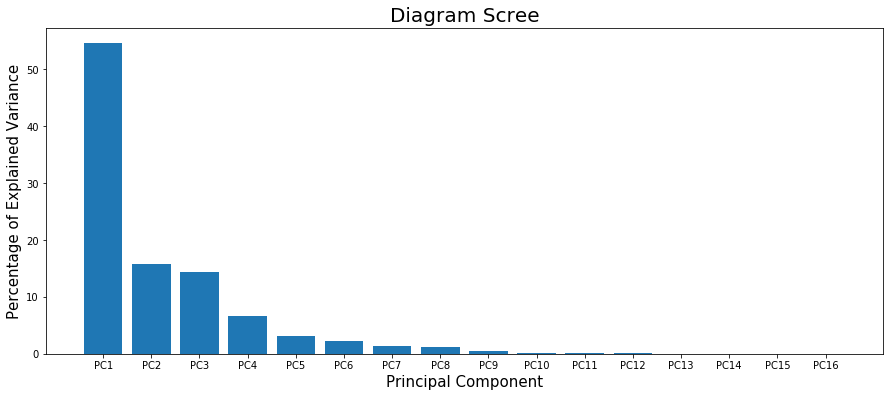

In [27]:
fig = plt.figure(figsize=(15,6))
plt.bar(x=range(1, len(explained_var_ratio_per_PCA)+1), height=explained_var_ratio_per_PCA, tick_label=pca_labels)
plt.ylabel('Percentage of Explained Variance', fontsize=15)
plt.xlabel('Principal Component', fontsize=15)
plt.title('Diagram Scree', fontsize=20)
plt.show()

In [29]:
print(f"Total variation explained by PC1 dan PC2 is :{pca.explained_variance_ratio_[:2].sum()*100}")

Total variation explained by PC1 dan PC2 is :70.27993909660275


### 7. K-Means Clustering
After finding the two principal components, we will further apply another algorithm to those axises, namely K-Means clustering. K-Means will search for the center of data (centroid) in those two components. When centroid is known, we can look for clusters of data in those two components. To justify the selection of the number of clusters, we will then calculate inertia by using the elbow method. Inertia measures how well a dataset is clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. What we look for is the point where the decrease in inertia begins to slow down. 

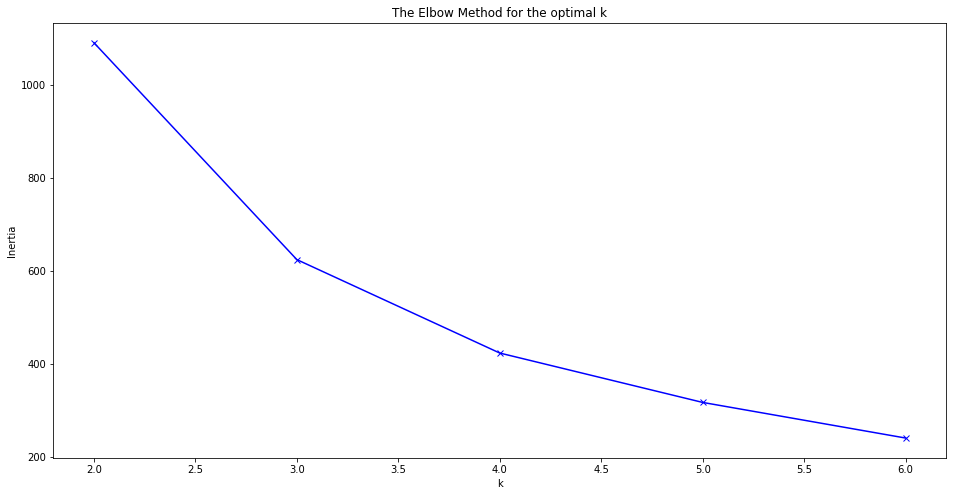

In [30]:
pca_clusters = pd.DataFrame(pca_df[['PC1','PC2']])

inertia = []
K = np.arange(2,7)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=8)
    kmeanModel.fit(pca_clusters)
    inertia.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method for the optimal k')
plt.show()

To ensure the selection of number of cluster, we will also make use of another metrics called `Silhouette Score`. It is used to evaluate the quality of clusters created in terms of how well samples are clustered with other samples that are similar to each other. The quality is shown in a score between -1 and 1. Score of 1 means that the cluster is dense and well-separated than other clusters. A score near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters. A negative score indicates that the samples might have got assigned to the wrong clusters.

In [33]:
silhouette_scores = []
number_of_cluster = range(2,11)

for i in number_of_cluster:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(pca_clusters)

  labels = kmeans.labels_
  silhouette_scores.append(silhouette_score(pca_clusters, labels, metric = 'euclidean'))

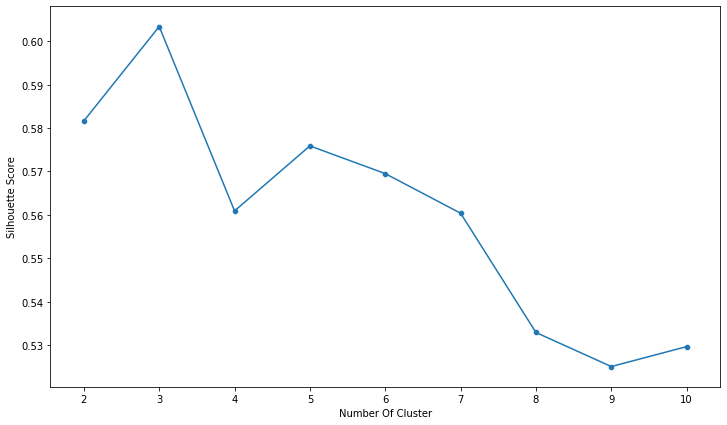

In [34]:
plt.figure(figsize=(12,7))

sns.lineplot(number_of_cluster, silhouette_scores)
sns.scatterplot(number_of_cluster, silhouette_scores)

plt.xticks(number_of_cluster)

plt.xlabel('Number Of Cluster')
plt.ylabel('Silhouette Score')
plt.show()

After getting the result from the two metrics, it is reasonable to select 3 as the number of cluster. It is because the dropping of inertia starts slowing down at k=3 and the highest silhouette score can be found when the number of cluster is 3.

In [35]:
k_means_clusters = KMeans(n_clusters=3,random_state=8).fit(pca_clusters)
cluster_center = k_means_clusters.cluster_centers_
cluster_preds = k_means_clusters.predict(pca_clusters)

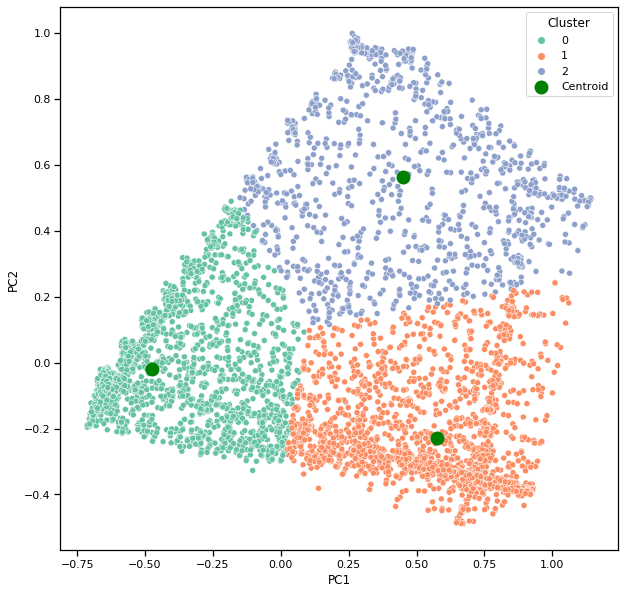

In [37]:
pca_clusters['cluster'] = cluster_preds

plt.figure(figsize=(10,10))
sns.set_context(context = 'notebook', font_scale=1)

sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'cluster', data = pca_clusters, palette='Set2')
plt.scatter(cluster_center[:,0],cluster_center[:,1], marker = "o", s=80, linewidths = 5, zorder = 10, c='green',label="Centroid")

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title="Cluster")
plt.show()

In [41]:
df_copy = df_ready.copy()
df_copy['cluster'] = cluster_preds
df_copy['cluster'].value_counts()

0    3937
1    2385
2    1112
Name: cluster, dtype: int64

In [42]:
cluster_0 = df_copy[df_copy['cluster']==0].drop('cluster', axis=1).mean()
cluster_1 = df_copy[df_copy['cluster']==1].drop('cluster', axis=1).mean()
cluster_2 = df_copy[df_copy['cluster']==2].drop('cluster', axis=1).mean()

In [43]:
cluster_0.sort_values(ascending=False)

TENURE                              0.952460
BALANCE_FREQUENCY                   0.844003
PURCHASES_FREQUENCY                 0.145998
CREDIT_LIMIT                        0.122209
CASH_ADVANCE_FREQUENCY              0.103445
ONEOFF_PURCHASES_FREQUENCY          0.080717
BALANCE                             0.076212
PRC_FULL_PAYMENT                    0.067658
PURCHASES_INSTALLMENTS_FREQUENCY    0.063911
CASH_ADVANCE_TRX                    0.026474
PAYMENTS                            0.022875
CASH_ADVANCE                        0.020342
MINIMUM_PAYMENTS                    0.007680
PURCHASES_TRX                       0.007533
ONEOFF_PURCHASES                    0.005276
INSTALLMENTS_PURCHASES              0.002637
dtype: float64

In [44]:
cluster_1.sort_values(ascending=False)

TENURE                              0.961216
BALANCE_FREQUENCY                   0.926458
PURCHASES_FREQUENCY                 0.868059
PURCHASES_INSTALLMENTS_FREQUENCY    0.821282
PRC_FULL_PAYMENT                    0.254521
CREDIT_LIMIT                        0.123685
ONEOFF_PURCHASES_FREQUENCY          0.101247
PURCHASES_TRX                       0.054088
BALANCE                             0.048132
CASH_ADVANCE_FREQUENCY              0.035662
INSTALLMENTS_PURCHASES              0.031198
PAYMENTS                            0.023811
CASH_ADVANCE_TRX                    0.009436
MINIMUM_PAYMENTS                    0.007348
CASH_ADVANCE                        0.006821
ONEOFF_PURCHASES                    0.006502
dtype: float64

In [45]:
cluster_2.sort_values(ascending=False)

TENURE                              0.973771
BALANCE_FREQUENCY                   0.972291
PURCHASES_FREQUENCY                 0.868633
ONEOFF_PURCHASES_FREQUENCY          0.782938
PURCHASES_INSTALLMENTS_FREQUENCY    0.402196
PRC_FULL_PAYMENT                    0.247902
CREDIT_LIMIT                        0.183651
PURCHASES_TRX                       0.082488
BALANCE                             0.072725
CASH_ADVANCE_FREQUENCY              0.046082
PAYMENTS                            0.038966
ONEOFF_PURCHASES                    0.038108
INSTALLMENTS_PURCHASES              0.019458
CASH_ADVANCE_TRX                    0.011830
CASH_ADVANCE                        0.008650
MINIMUM_PAYMENTS                    0.007094
dtype: float64

After clustering the dataset into the three clusters, we can further analyze the features that best characterize each feature by using the radar chart. The result can be seen in the diagram shown.

In [48]:
def make_radar_chart(dataset, title):

    mean_feature_per_cluster = dataset.groupby("cluster").mean().to_numpy()
    name_feature = dataset.columns[0:-1]
    categories = np.arange(0, len(mean_feature_per_cluster))
    
    fig = go.Figure()

    for i in range(len(mean_feature_per_cluster)):
      fig.add_trace(go.Scatterpolar(
          r=mean_feature_per_cluster[i],
          theta=name_feature,
          name=f'class {categories[i]}'
      ))

    fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[np.min(mean_feature_per_cluster), np.max(mean_feature_per_cluster)]
        )),
      showlegend=True,
      width = 1200,
      height = 720,
      title = dict(text = f'Feature comparison ({title})\n',
                   font=dict(size=20))
    )

    fig.show()

make_radar_chart(df_copy, 'Credit Card Dataset')

## 8. Customer Segmentation

### 8.1 Cluster 1 - Red
Customers in this cluster is identified by an active use of their credit card for buying stuffs as indicated by a high score in `PURCHASES_FREQUENCY` (0.87). In this case, they pay mostly in installments as indicated by a high score in `PURCHASES_INSTALLMENTS_FREQUENCY` (0.82).

### 8.1 Cluster 2  - Blue
Despite a high frequency in updating the balance as shown in high score of `BALANCE_FREQUENCY` (0.84), Customers in this cluster is identified by their low frequency of credit card use in any type of payment method. 

### 8.1 Cluster 3 - Cyan
Customers in this cluster can be recognized by their active use of credit card as shown by the score in `PURCHASES_FREQUENCY`(0.97) . In this case, they make use of both installment payment   `PURCHASES_INSTALLMENTS_FREQUENCY` of 0.40 and one-off payment `ONEOFF_PURCHASES_FREQUENCY` of 0.78.

## 9. Business Insight

From the business perspective, those three clusters are not really problematic to the stakeholder - the bank in this case, due to their normal transaction activity. As a Data Scients, however, we can offer some suggestions in a purpose to increase the stakeholder's revenue. Some possible suggestions include:

### 9.1 Cluster 1
Customers in this clusters need to be well-maintained so that they will keep actively using their credit card. The bank can offer the increase in their credit card limit to encourage them using their card. In addition, we can also offer other similar services as they keep maintaining good payment. 

### 9.2 Cluster 2
These customers can be offered more services related to cash-advance with lower interest, such as cash-advance by phone so that they are encouraged to use their card more often. 

### 9.3 Cluster 3
The bank can offer various products with good benefit so that the customers in this cluster can even be more active in using their card than their present use. 

---
---
